# Project 1 - Almond Pricing Analysis - DSC 680 - Emilio Flores

## Data and Libraries

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV

In [4]:
# Import historical almond pricing and production data
almond_df = pd.read_excel('AlmondData.xlsx')

# Import historical US population data
uspopulation_df = pd.read_excel('USPopulation.xlsx')

# Import historical USD Index data
usindex_df = pd.read_excel('USDollarIndex.xlsx')

## Data Preparation

In [6]:
# Merge US population data into almond data frame
almond_df['USPopulation_Millions'] = uspopulation_df['July 1 (million people)1']

In [7]:
# Filter US Index data from 1981 to 2024
usindex_1981to2024 = usindex_df.loc[usindex_df['Year (last business day)'] >= 1981, :]

# Reset index
usindex_1981to2024 = usindex_1981to2024.reset_index()

In [8]:
# Merge USDIndex data into almond data frame
almond_df['USDIndex'] = usindex_1981to2024['DXY close']

In [9]:
# Save marketing years
marketing_year = almond_df['Marketing_Year']

In [10]:
# Drop unnecessary columns
uncolumns = ['Marketing_Year','Yield_Lbs_Per_Acre',
             'Value_of_Production_Usd_Mill','Utilized_Production_Lbs_Mill',
             'Current_Reserve_Lbs_Mill','Percapita_Availability_Lbs']

# Drop columns
almond_df.drop(columns=uncolumns, inplace=True)

In [11]:
# Show final data frame
almond_df.head()

,Bearing_Acres_Th,Total_Production_Lbs_Mill,Price_Cents_Per_Lb,Loss_Production_Lbs_Mill,Marketable_Production_Lbs_Mill,Imports_lbs_Mill,Beginning_Stocks_Lbs_Mill,Supply_Lbs_Mill,Ending_Stocks_Lbs_Mill,Exports_Lbs_Mill,Domestic_Availability_Lbs_Mill,USPopulation_Millions,USDIndex
0,326.8,322,147.0,16.86,305.14,0.07,78950.0,384.160,101.657,186.93,95.573,227.7,104.69
1,326.2,408,78.0,24.87,383.13,0.04,101657.0,484.827,161.014,207.89,115.923,230.0,117.91
2,339.0,347,94.0,16.24,330.76,0.57,161014.0,492.344,176.949,177.98,137.415,232.2,131.79
3,360.0,242,104.0,20.21,221.79,0.18,176949.0,398.919,90.623,171.70,136.596,234.3,151.47
4,381.0,590,77.4,26.36,563.64,0.24,90623.0,654.503,227.010,266.78,160.713,236.3,123.55


## Linear Regression Analysis

In [13]:
# Create X feature matrix
X = almond_df.drop(columns='Price_Cents_Per_Lb')

# Select target variable
y = almond_df['Price_Cents_Per_Lb']

In [14]:
# Split data into training and testing sets (80%/20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [15]:
# Create model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Test model
y_pred = model.predict(X_test)

In [17]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 32.71
Mean Squared Error (MSE): 2473.63
Root Mean Squared Error (RMSE): 49.74
R² Score: 0.7233


In [18]:
# Get the feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

# Print coefficients
print(coefficients.sort_values(by='Coefficient', ascending=False))

                           Feature  Coefficient
4                 Imports_lbs_Mill     3.967334
6                  Supply_Lbs_Mill     2.122925
8                 Exports_Lbs_Mill     0.846494
7           Ending_Stocks_Lbs_Mill     0.774407
10           USPopulation_Millions     0.728366
2         Loss_Production_Lbs_Mill     0.675250
9   Domestic_Availability_Lbs_Mill     0.502024
0                 Bearing_Acres_Th     0.279754
5        Beginning_Stocks_Lbs_Mill    -0.003078
11                        USDIndex    -1.023544
1        Total_Production_Lbs_Mill    -1.169156
3   Marketable_Production_Lbs_Mill    -1.844406


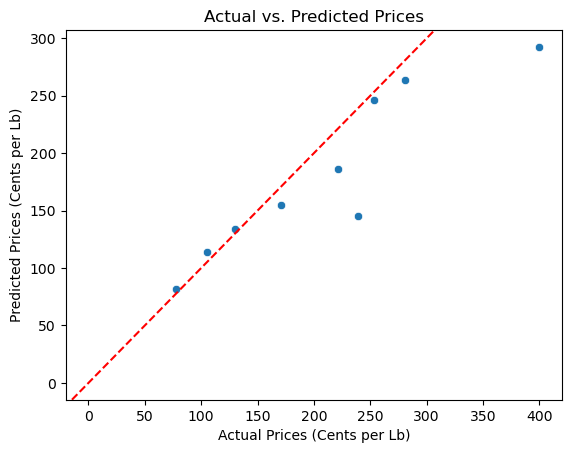

In [19]:
# Plot scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Show ideal line
plt.axline([0, 0], [1, 1], color="red", linestyle="--")

# Plot labels
plt.xlabel("Actual Prices (Cents per Lb)")
plt.ylabel("Predicted Prices (Cents per Lb)")
plt.title("Actual vs. Predicted Prices")

# Show chart
plt.show()

## Ridge Regression Analysis

In [21]:
# Create empty data frame 
vif_data = pd.DataFrame()

# Add feature matrix as columns
vif_data["Feature"] = X.columns

# Compute the Variance Inflation Factor (VIF) for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Show VIF
print(vif_data)

                           Feature          VIF
0                 Bearing_Acres_Th   353.929946
1        Total_Production_Lbs_Mill          inf
2         Loss_Production_Lbs_Mill          inf
3   Marketable_Production_Lbs_Mill          inf
4                 Imports_lbs_Mill    23.959837
5        Beginning_Stocks_Lbs_Mill  6262.688105
6                  Supply_Lbs_Mill          inf
7           Ending_Stocks_Lbs_Mill          inf
8                 Exports_Lbs_Mill          inf
9   Domestic_Availability_Lbs_Mill          inf
10           USPopulation_Millions    78.593529
11                        USDIndex    50.163597


C:\Users\emili\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [22]:
# Create standard scaler
scaler = StandardScaler()

# Fit scaler
X_train_scaled = scaler.fit_transform(X_train)

# Transfrom test matrix
X_test_scaled = scaler.transform(X_test)

In [23]:
# Initialize Ridge regression
ridge_model = Ridge(alpha=1.0)

# Fit training data into model
ridge_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test_scaled)

In [24]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 31.10
Mean Squared Error (MSE): 2595.78
Root Mean Squared Error (RMSE): 50.95
R² Score: 0.7097


In [25]:
# Get the feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})

# Show coefficients
print(coefficients.sort_values(by='Coefficient', ascending=False))

                           Feature  Coefficient
4                 Imports_lbs_Mill    63.297927
0                 Bearing_Acres_Th    27.864404
10           USPopulation_Millions    20.523656
8                 Exports_Lbs_Mill    -0.277304
2         Loss_Production_Lbs_Mill    -3.913615
5        Beginning_Stocks_Lbs_Mill    -6.271804
6                  Supply_Lbs_Mill    -8.053045
1        Total_Production_Lbs_Mill    -9.090824
3   Marketable_Production_Lbs_Mill    -9.170580
7           Ending_Stocks_Lbs_Mill   -11.888543
11                        USDIndex   -14.186478
9   Domestic_Availability_Lbs_Mill   -22.994026


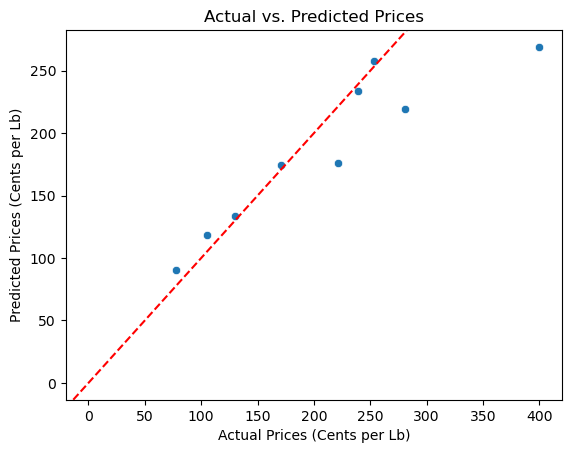

In [26]:
# Plot scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Show ideal line
plt.axline([0, 0], [1, 1], color="red", linestyle="--")

# Plot labels
plt.xlabel("Actual Prices (Cents per Lb)")
plt.ylabel("Predicted Prices (Cents per Lb)")
plt.title("Actual vs. Predicted Prices")

# Show chart
plt.show()

## Ridge Model Optimization

In [28]:
# Define a range of alpha values
alphas = {'alpha': np.logspace(-3, 3, 10)}

In [29]:
# Create Grid Search model with Cross-Validation
ridge_cv = GridSearchCV(Ridge(), alphas, cv=5, scoring='r2')

# Fit Grid Search model
ridge_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='r2')

In [30]:
# Get the best alpha
best_alpha = ridge_cv.best_params_['alpha']

# Print result
print(f"Best Alpha: {best_alpha}")

Best Alpha: 2.154434690031882


In [31]:
# Set Ridge model with optimized alpha value
ridge_model_optimal = Ridge(alpha=best_alpha)

# Fit training data into Ridge model
ridge_model_optimal.fit(X_train_scaled, y_train)

Ridge(alpha=2.154434690031882)

In [32]:
# Make predictions with optimized Ridge model
y_pred_optimal = ridge_model_optimal.predict(X_test_scaled)

In [33]:
# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred_optimal)
mse = mean_squared_error(y_test, y_pred_optimal)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_optimal)

# Print evaluation metrics
print(f"Optimized Mean Absolute Error (MAE): {mae:.2f}")
print(f"Optimized Mean Squared Error (MSE): {mse:.2f}")
print(f"Optimized Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Optimized R² Score: {r2:.4f}")

Optimized Mean Absolute Error (MAE): 36.26
Optimized Mean Squared Error (MSE): 3233.40
Optimized Root Mean Squared Error (RMSE): 56.86
Optimized R² Score: 0.6383


In [34]:
# Get the feature importance (coefficients)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model_optimal.coef_})

# Show coefficients
print(coefficients.sort_values(by='Coefficient', ascending=False))

                           Feature  Coefficient
4                 Imports_lbs_Mill    54.560576
10           USPopulation_Millions    16.154383
0                 Bearing_Acres_Th    15.279725
8                 Exports_Lbs_Mill    -0.141693
2         Loss_Production_Lbs_Mill    -3.505363
5        Beginning_Stocks_Lbs_Mill    -4.517457
6                  Supply_Lbs_Mill    -4.977698
1        Total_Production_Lbs_Mill    -5.722350
3   Marketable_Production_Lbs_Mill    -5.751424
9   Domestic_Availability_Lbs_Mill    -9.885883
7           Ending_Stocks_Lbs_Mill   -12.762904
11                        USDIndex   -13.444154


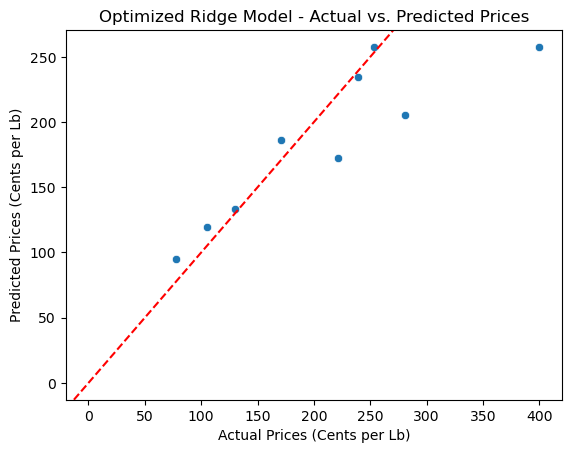

In [35]:
# Plot optimized Ridge regression model
sns.scatterplot(x=y_test, y=y_pred_optimal)

# Show ideal line
plt.axline([0, 0], [1, 1], color="red", linestyle="--")

# Plot labels
plt.xlabel("Actual Prices (Cents per Lb)")
plt.ylabel("Predicted Prices (Cents per Lb)")
plt.title("Optimized Ridge Model - Actual vs. Predicted Prices")

# Show chart
plt.show()